# Module 4 - Diffusion-limited Aggregation
### Author: Neil Tramsen
### Group Members: Gustavo Borjas, Bonning Xu, Christopher Liu
In this project, we develop a computational model for diffusion-limited aggregation (DLA). DLA forms branching structures formed by randomly moving particles, that become stationary and frozen in place when they come into contact with other particles, forming a solid structure. This can be used to model a wide variety of real life processes in Physics and Chemistry, including the movement of metal ions on to an electrode, the coalescing of dust and smoke particles, and the growth of some crystals.

This notebook takes around a minute to run completely.

## Problem Analysis
### Physical Considerations
DLA structures form due to randomly moving particles, that become frozen in place when they hit a stationary structure made up of other particles. Our main physical consideration is the space in which the particle moves. For this purpose, we will create a lattice, in which the particle can take random steps left or right, and up or down. While this doesn't provide a perfectly accurate simulation of the real world, in which particles can take steps in any direction, as the lattice and number of walkers gets bigger, this discretised set of directions will approximate a random walk in which a particle can move in any direction.

As there are no conclusive analytical equations for this model, we will heavily rely on robust and accurate programming to turn this physical model into a computational model.
### Coding Considerations
For the first particle to become stationery, we will have to create the lattice with one particle already stationary on it, with which the first particle has to come into contact to become stationary. This poses a problem: if the random walk walk was started in a random location, it may take a very long time, and a very large number of steps, before the particles come into contact. Ideally, the particles would come from infinity, but ofcourse the lattice has a finite size, and the average distance covered by a random walk is $\sqrt{N}$, where N is the number of steps. For this reason, in this project we will create a circle around the stationary structure, with a radius just larger than the structure's radius, and we will place the particle on a random point on this circles radius. If the particle tries to leaves this circle, we will ignore this step, and generate new random steps until the particle continues moving inward. This simulates the particle approaching randomly from infinity, and also ensures the particle will hit the structure relatively quickly.

There are two main ways to approach this problem: it could be represented as a cellular automaton simulation for which each cell in the lattice would adhere to a set of rules, or it can be represented as an agent-based simulation, in which we would track each walker which behaves according to a set of rules. For this project it is actually most useful to use a combination of the two, as we have agents moving on a lattice of discretised cells. We will release a single particle on to the lattice, track its motion, and then check the cells around it to see if they contain another particle, like in cellular automaton.

## Model Development
To start the walker, we will take the current radius of the structure plus 1, and pick a random angle $0<\theta<2\pi$. The initial position of the walker will be $$ x = r\cos{\theta},$$ $$y=r\sin{\theta}.$$ Both the $x$ and $y$ coordiantes must be converted to integers to represent positions on the lattice. Another random number will be used to determine a random direction for the walker to move in. A while loop will continue generating steps until the step moves inwards in the circle, and each subsequent step will be checked such that the particle never leaves the original circle.

Once the particle has come to a stop, the radius of the structure will be recalculated, and the next particle will be placed on the lattice.

## Model Implementation
### Initialising Python
This notebook can be used to generate a movie of the DLA structure growing. To do this, one must have html_movie.py saved to the same directory as this notebook, and uncomment all lines beginning with #***. html_movie.py is available at: http://physicalmodelingwithpython.blogspot.com/p/code-samples.html.

In [1]:
import numpy as np, matplotlib.pyplot as plt
import numpy.random as nprnd
from time import time
#***from html_movie import movie # this program is available at http://physicalmodelingwithpython.blogspot.com/p/code-samples.html
                                 # and is used in this project to create a movie, as described in in the course textbook

### Initialising a walker

In [2]:
def start_walker(lattice, Radius, x0, y0):
    
    """
    This function generates a random integer position on the radius of a circle, centered at x0, y0.
    start_walker(lattice, Radius, x0, y0)
    returns: (x_position, y_position)
    """
   
    radians = 2*np.pi*nprnd.random() # generates a random angle
    
    x = int(round(x0 + (Radius+1)*np.cos(radians),0))
    y = int(round(y0 + (Radius+1)*np.sin(radians),0))
        
    return (x,y)

### Random walk

In [3]:
def run_walker(lattice, Radius, x0, y0):  

    x, y = start_walker(lattice, Radius, x0, y0) # initial position of particle
    
    while (True):
        while(True): 
            directions = int(np.floor(nprnd.random(1)*4)) # (0,1,2,3) directions of motion on each time step
            dx = (directions == 0) - 1.0*(directions == 1)  # directions == 0/1 corresponds to right/left motion
            dy = (directions == 2) - 1.0*(directions == 3)  # directions == 2/3 corresponds to top/down motion
            if(int(np.sqrt(((x-x0+dx)**2) + ((y-y0+dy)**2)))<=Radius+1): # checks the walker hasn't moved out of the circle
                break # if the walker has not moved out of the circle, stop generating steps
        
        x = x+int(dx) # take step     
        y = y+int(dy)
        
        neighbors_cluster = lattice[x,y+1]+lattice[x,y-1]+lattice[x+1,y]+lattice[x-1,y] # checks if the particle is next to stationary structure
        if (neighbors_cluster>0): # the walker is near the cluster
            lattice[x,y] = 1 # adds the walker to the cluster
            Radius_New = int(np.sqrt(((x-x0+dx)**2) + ((y-y0+dy)**2))) # calculates the particles distance from the centre
            if (Radius<Radius_New): # if particle's distance from centre is greater than radius of structure, particles distance is the new radius
                Radius = Radius_New
            break
    return (lattice, Radius)

### DLA Function

Attached walker No.  0
Attached walker No.  500
Attached walker No.  1000
Attached walker No.  1500
Attached walker No.  2000
Attached walker No.  2500
Attached walker No.  3000
Attached walker No.  3500
Attached walker No.  4000
Attached walker No.  4500
Attached walker No.  5000
Attached walker No.  5500
Attached walker No.  6000
Attached walker No.  6500
Attached walker No.  7000
Attached walker No.  7500
Attached walker No.  8000
Attached walker No.  8500
Attached walker No.  9000
Attached walker No.  9500


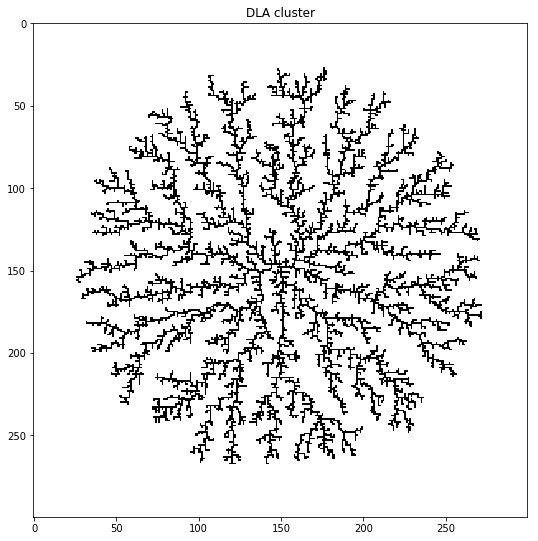

In [4]:
def DLA(N_walkers, L):
    lattice = np.zeros((L,L)) # the lattice itself
    Notification = 500 # notify at every nth walker
    x0, y0 = int(L/2), int(L/2) # center of circle, and position of first stationary particle
    lattice[x0, y0] = 1 # seeding the DLA structure

    Radius = 1 # initial radius

    for i in np.arange(N_walkers):
        lattice, Radius = run_walker(lattice, Radius, x0, y0)
        if (Radius>=x0-1): #Check so that shape doesn't get bigger than radius
            print("Too many walkers for this lattice size. ",i,"walkers were released.")
            break
        if (np.round(i/Notification)==i/Notification): # signal attachment of every nth walker
            print('Attached walker No. ',i) # we do this to monitor progress
    return lattice

# initialization block
N_walkers = 10000  # how many walkers in a cluster
L = 300            # lattice size
lattice = DLA(N_walkers, L)

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(lattice, cmap='Greys',  interpolation='nearest',aspect=1)
ax1.set_title('DLA cluster')
plt.show()

## Verification
- Circular shape: when placing a walker, any point on the circumference of the circle is equally likely, so the final result for the structure should be approximately circular, with no radial direction favoured by the walkers.
- No walkers: if there are no walkers, no lattice is formed.
- No initial structure: if there is no starting point for the structure, the first particles walk results in an infinite loop, as it never finds another particle and becomes stationary.
### Random Steps
If the step directions are random, each step should have an equal probability of occurring. The graph below shows that each direction occurred a roughly equal number of times during a random walk.

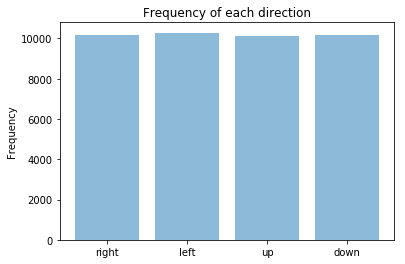

In [5]:
num_directions = np.zeros(4)
N_walkers = 10000  # how many walkers in a cluster
L = 300            # lattice size
lattice = np.zeros((L,L)) # the lattice itself
x0, y0 = int(L/2), int(L/2) # center of circle, and position of first stationary particle
lattice[x0, y0] = 1 # seeding the DLA structure
Radius = 50 # large initial radius so that walk lasts a larger number of steps

x, y = start_walker(lattice, Radius, x0, y0) # initial position of particle
    
while (True):
    while(True): 
        directions = int(np.floor(nprnd.random(1)*4)) # (0,1,2,3) directions of motion on each time step
        num_directions[directions]=num_directions[directions]+1 # counts number of times a direction occurrs
        dx = (directions == 0) - 1.0*(directions == 1)  # directions == 0/1 corresponds to right/left motion
        dy = (directions == 2) - 1.0*(directions == 3)  # directions == 2/3 corresponds to top/down motion
        if(int(np.sqrt(((x-x0+dx)**2) + ((y-y0+dy)**2)))<=Radius+1): # checks the walker hasn't moved out of the circle
            break # if the walker has not moved out of the circle, stop generating steps

    x = x+int(dx) # take step     
    y = y+int(dy)

    neighbors_cluster = lattice[x,y+1]+lattice[x,y-1]+lattice[x+1,y]+lattice[x-1,y] # checks if the particle is next to stationary structure
    if (neighbors_cluster>0): # the walker is near the cluster
        lattice[x,y] = 1 # adds the walker to the cluster
        Radius_New = int(np.sqrt(((x-x0+dx)**2) + ((y-y0+dy)**2))) # calculates the particles distance from the centre
        if (Radius<Radius_New): # if particle's distance from centre is greater than radius of structure, particles distance is the new radius
            Radius = Radius_New
        break
        
objects = ('right', 'left', 'up', 'down')
y_pos = np.arange(len(objects))
plt.bar(y_pos, num_directions, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Frequency of each direction')
 
plt.show()


## Cluster Radius
As we add particles, the radius of the cluster increases. However, the increase is not linear, and the goal of this section is to make an estimate of the relationship between the number of particles and the radius size using numpy's least squares algorithm.

Attached walker No.  0
Attached walker No.  1000
Attached walker No.  2000
Attached walker No.  3000
Attached walker No.  4000
Attached walker No.  5000
Attached walker No.  6000
Attached walker No.  7000
Attached walker No.  8000
Attached walker No.  9000


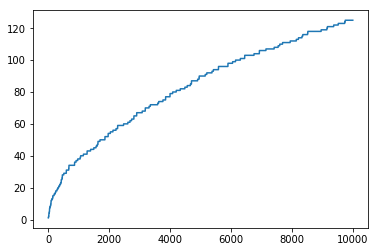

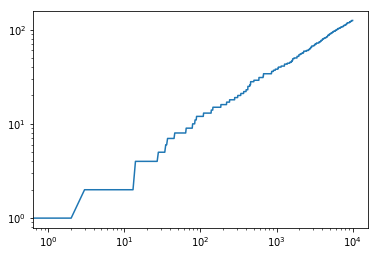

Estimated a=0.5253825014538439


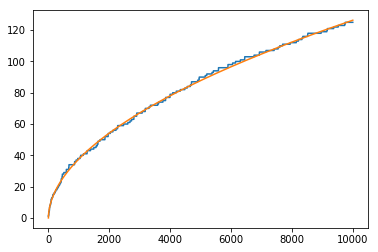

In [6]:
# initialization block
N_walkers = 10000                # how many walkers in a cluster
L = 300                          # lattice size
lattice = np.zeros((L,L))    # the lattice itself
Notification = 1000         # notify at every nth walker
x0, y0 = int(L/2), int(L/2)
lattice[x0, y0] = 1    # seeding the DLA cluster

Radius = 0 #Creates Radius element

radii = np.zeros(N_walkers)

for i in np.arange(N_walkers):
    lattice, Radius = run_walker(lattice, Radius, x0, y0)
    radii[i]=Radius
    if (Radius>=x0-2): #Check so that shape doesn't get bigger than radius
        print("Too many walkers for this lattice size. ",i,"walkers were released.")
        break
    if (np.round(i/Notification)==i/Notification):                # signal attachment of every 100th walker
        print('Attached walker No. ',i)# we do this to monitor progress

plt.plot(radii)
plt.show()

plt.loglog(radii)
plt.show()

x = np.log(np.arange(1000, N_walkers))
x = x.reshape((x.size,1))
y = np.log(radii[1000::])
y = y.reshape((y.size,1))

a = float(np.linalg.lstsq(x, y, rcond=None)[0])
v_guess = a
print('Estimated a=' + str(v_guess))

x = np.arange(N_walkers)
plt.plot(radii)
plt.plot(x, x**a)
plt.show()

The first graph confirms that the relationship between the number of particles and the radius is not linear.
$$y=x^a$$
$$\ln{y}=a\ln{x}$$
We take the logarithm of both the x and y values, which does result in a linear graph, especually for larger values of $N$, the number of particles. We the find the gradient using numpy's least squares regression algorithm, and find the value for $a$ to be approximately 0.5. This means that $R=\sqrt{N}$. This makes sense, as at first adding a walker will have a much larger effect on the radius, as that one walker amkes up a much greater proportion of the structure. However, as $N$ gets very large, adding a walker adds very little to the circe, and thus the increase in radius is minimal.

## An alternative DLA structure
Not all DLA structures are formed around a central point. For an example, an anode or cathode could be represented as a line pf particles, that attract ions and cause them to become stationary when they come into contact. This is easily implemented by editing the above functions a little.

Attached walker No.  0
Attached walker No.  500
Attached walker No.  1000
Attached walker No.  1500
Attached walker No.  2000
Attached walker No.  2500
Attached walker No.  3000
Attached walker No.  3500
Attached walker No.  4000
Attached walker No.  4500


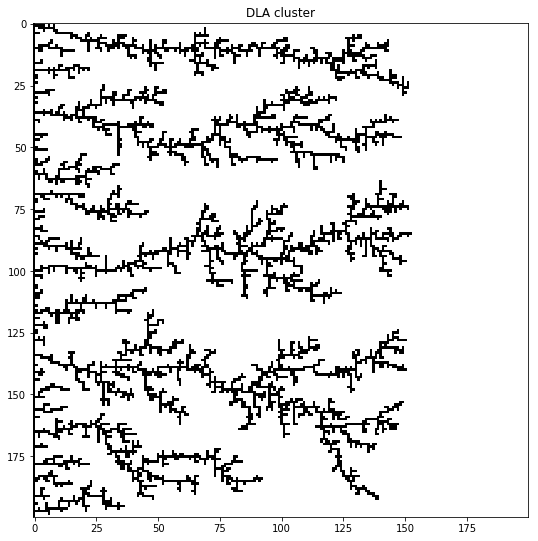

In [7]:
def start_walker_line(lattice, y0):
    
    """
    This function generates a random integer position on the radius of a circle, centered at x0, y0.
    start_walker(lattice, Radius, x0, y0)
    returns: (x_position, y_position)
    """
   
    x = np.floor(lattice[:,0].size*nprnd.random()) # generates position
        
    return (int(x),y0+2)

def run_walker_line(lattice, y0):
    #print("walker released")
    x, y = start_walker_line(lattice, y0) # initial position of particle
    
    while (True):
        while(True): 
            directions = int(np.floor(nprnd.random(1)*4)) # (0,1,2,3) directions of motion on each time step
            dx = (directions == 0) - 1.0*(directions == 1)  # directions == 0/1 corresponds to right/left motion
            dy = (directions == 2) - 1.0*(directions == 3)  # directions == 2/3 corresponds to top/down motion
            if((y+dy)<=(y0+2) and x+dx<lattice[:,0].size-1 and x+dx>=1): # checks the walker hasn't moved out of the circle
                break # if the walker has not moved out of the circle, stop generating steps
        
        x = x+int(dx) # take step     
        y = y+int(dy)
        
        #print(x, y)
        
        neighbors_cluster = lattice[x,y+1]+lattice[x,y-1]+lattice[x+1,y]+lattice[x-1,y] # checks if the particle is next to stationary structure
        if (neighbors_cluster>0): # the walker is near the cluster
            lattice[x,y] = 1 # adds the walker to the cluster
            if (y0<y): # if particle's distance from centre is greater than radius of structure, particles distance is the new radius
                y0 = y
            break
    return (lattice,y0)

def DLA_line(N_walkers, L):
    lattice = np.zeros((L,L)) # the lattice itself
    Notification = 500 # notify at every nth walker
    lattice[:, 0] = 1 # seeding the DLA structure

    y0 = 0

    for i in np.arange(N_walkers):
        lattice, y0 = run_walker_line(lattice, y0)
        if (y0>=L-1): #Check so that shape doesn't get bigger than radius
            print("Too many walkers for this lattice size. ",i,"walkers were released.")
            break
        if (np.round(i/Notification)==i/Notification): # signal attachment of every nth walker
            print('Attached walker No. ',i) # we do this to monitor progress
    return lattice

# initialization block
N_walkers = 5000  # how many walkers in a cluster
L = 200            # lattice size
lattice = DLA_line(N_walkers, L)

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(lattice, cmap='Greys',  interpolation='nearest',aspect=1)
ax1.set_title('DLA cluster')
plt.show()

##  Structure growth timelapse
The following code generates a timelapse of the structure growing, in the form of a few lattices at different times. It also generates a movie using the imported python program, html_movie.py, the file for which must be saved in the same location as this notebook for this code to execute. Editing the notification parameter will change the number of timelapse images, as well as the number of images used in the movie. TO generate the movie, uncomment all lines beginning with #***.

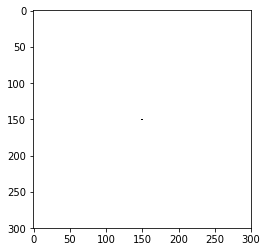

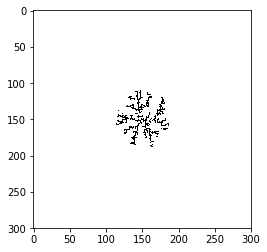

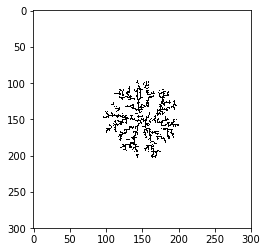

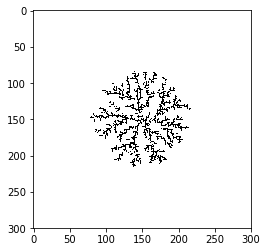

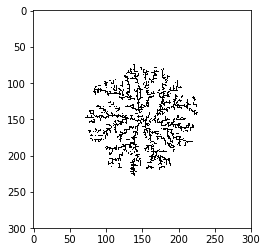

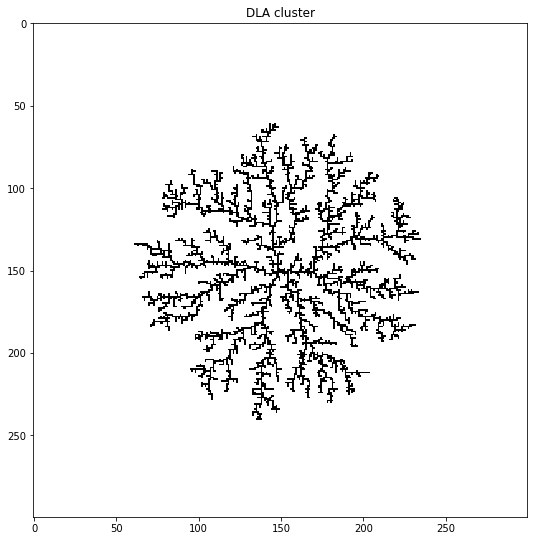

In [8]:
# initialization block
N_walkers = 5000  # how many walkers in a cluster
L = 300            # lattice size

lattice = np.zeros((L,L)) # the lattice itself
Notification = 1000 # notify at every nth walker
x0, y0 = int(L/2), int(L/2) # center of circle, and position of first stationary particle
lattice[x0, y0] = 1 # seeding the DLA structure

Radius = 1 # initial radius
#***file_name = "{:03d}_movie.jpg" # allows us to name images in the order they are created

for i in np.arange(N_walkers):
    lattice, Radius = run_walker(lattice, Radius, x0, y0)
    if (Radius>=x0-1): #Check so that shape doesn't get bigger than radius
        print("Too many walkers for this lattice size. ",i,"walkers were released.")
        break
    if (np.round(i/Notification)==i/Notification): # signal attachment of every nth walker
        #print('Attached walker No. ',i) # we do this to monitor progress
        
        plt.imshow(lattice, cmap='Greys',  interpolation='nearest')
        #***plt.savefig(file_name.format(i)) # saves plot as jpg
        plt.show()

fig1 = plt.figure(figsize=(20,20))
ax1 = fig1.add_subplot(2,2,1) 
ax1.imshow(lattice, cmap='Greys',  interpolation='nearest',aspect=1)
ax1.set_title('DLA cluster')
plt.show()

#***movie(input_files='*.jpg',output_file='movie.html',fps=5) # creates movie in the same folder as this notebook

## Conclusion
This project successfully implements a computational model for DLA, which is adapatable for different patterns of DLA caused by different initial structures. Our model implements a circular structure, with an initial central particle, and a structure oriented to one side, with an initial line of particles. The structures are formed using particles that make truly random walks across the lattice. The outcome is an aesthetically pleasing, natural, and unpredictable structure. We also succesfully determine the realtionship between the radius of the structure, and the number of particles in the structure, which is $R=\sqrt{N}$.